In [1]:
import numpy as np

num_dim = 1024
num_stacks = 8
num_data = num_dim * num_stacks
num_symbols = num_dim * num_stacks * 2

bits = np.random.randint(0, 2, num_symbols)
args = np.pi * bits
x_bits = np.cos(args) + 1j * np.sin(args)

noise_power = 0.3 / np.sqrt(2)
noise = np.random.randn(num_symbols) + 1j * np.random.randn(num_symbols)
x_sigs = x_bits + noise_power * noise

x_data = np.vstack((x_sigs.real, x_sigs.imag))
x_data = np.transpose(x_data)
y_data = bits
y_data = y_data.reshape(-1,1)

x_train = x_data[:num_data]
y_train = y_data[:num_data]

x_test = x_data[num_data:]
y_test = y_data[num_data:]

print(x_data.shape, x_train.shape, x_test.shape)
print(y_data.shape, y_train.shape, y_test.shape)

(16384, 2) (8192, 2) (8192, 2)
(16384, 1) (8192, 1) (8192, 1)


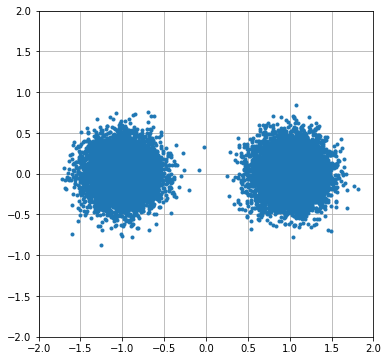

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(x_sigs.real, x_sigs.imag, '.')
plt.axis([-2, 2, -2, 2])
plt.grid()
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Flatten(input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

model.evaluate(x_test, y_test)

Epoch 1/10
205/205 [==============================] - 2s 5ms/step - loss: 0.3634 - accuracy: 0.9483 - val_loss: 0.2049 - val_accuracy: 1.0000
Epoch 2/10
205/205 [==============================] - 1s 3ms/step - loss: 0.1206 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 1.0000
Epoch 3/10
205/205 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 4/10
205/205 [==============================] - 1s 3ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 5/10
205/205 [==============================] - 1s 4ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 6/10
205/205 [==============================] - 1s 3ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 7/10
205/205 [==============================] - 1s 5ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 

[0.0023599385749548674, 1.0]

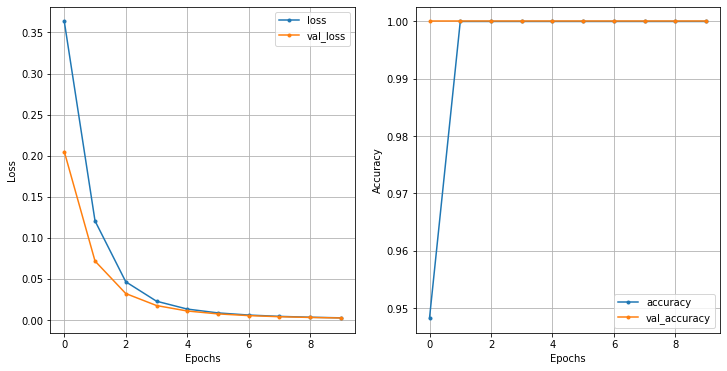

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '.-', label='loss')
plt.plot(history.history['val_loss'], '.-', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '.-', label='accuracy')
plt.plot(history.history['val_accuracy'], '.-', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()